In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [92]:
df = pd.read_csv('Month_value_1.csv')

In [93]:
df.shape

(96, 5)

In [94]:
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [95]:
df.tail()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
91,01.08.2022,NaN,NaN,NaN,NaN
92,01.09.2022,NaN,NaN,NaN,NaN
93,01.10.2022,NaN,NaN,NaN,NaN
94,01.11.2022,NaN,NaN,NaN,NaN
95,01.12.2022,NaN,NaN,NaN,NaN


In [71]:
print( df.columns)

Index(['Period', 'Revenue', 'Sales_quantity', 'Average_cost',
       'The_average_annual_payroll_of_the_region'],
      dtype='object')


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [96]:
#finding missing values
df.isnull().sum()

Period                                       0
Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64

In [98]:
df.isnull().sum()/df.shape[0]*100

Period                                       0.000000
Revenue                                     33.333333
Sales_quantity                              33.333333
Average_cost                                33.333333
The_average_annual_payroll_of_the_region    33.333333
dtype: float64

In [99]:
#finding duplicates
df.duplicated().sum()

0

In [102]:
#identifying garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print ("***"*10)

01.01.2015    1
01.02.2015    1
01.11.2020    1
01.10.2020    1
01.09.2020    1
             ..
01.06.2017    1
01.05.2017    1
01.04.2017    1
01.03.2017    1
01.12.2022    1
Name: Period, Length: 96, dtype: int64
******************************


In [104]:
#Exploratory data analysis
#descriptive statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Revenue,64.0,3.236045e+07,1.164150e+07,1.402148e+07,2.242655e+07,3.209088e+07,3.992999e+07,5.875647e+07
Sales_quantity,64.0,1.919738e+04,6.591287e+03,8.314000e+03,1.506550e+04,1.836800e+04,2.285625e+04,3.806900e+04
Average_cost,64.0,1.695061e+03,2.968448e+02,1.110577e+03,1.499143e+03,1.654400e+03,1.916401e+03,2.559328e+03
The_average_annual_payroll_of_the_region,64.0,2.869083e+07,1.057191e+06,2.740647e+07,2.782857e+07,2.819785e+07,2.987852e+07,3.002468e+07


In [105]:
df.describe(include="object")

,Period
count,96
unique,96
top,01.01.2015
freq,1


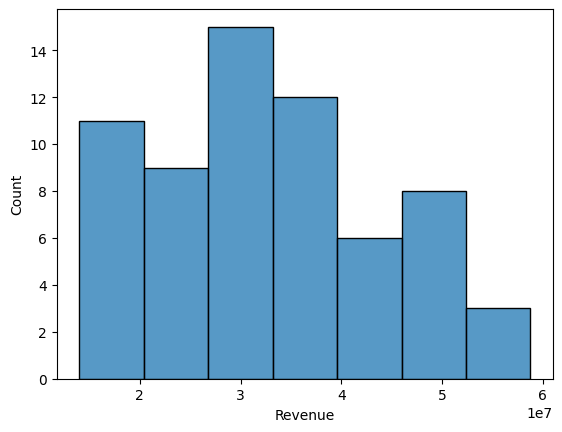

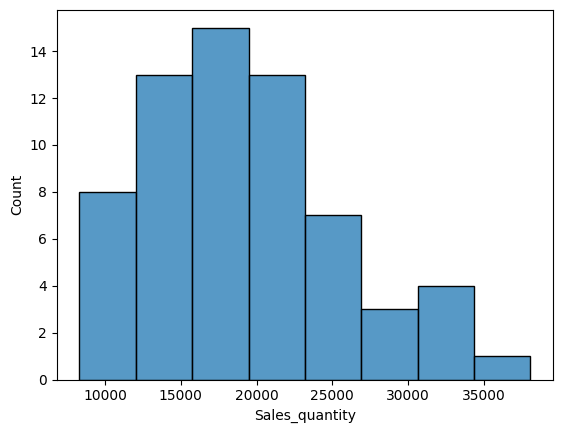

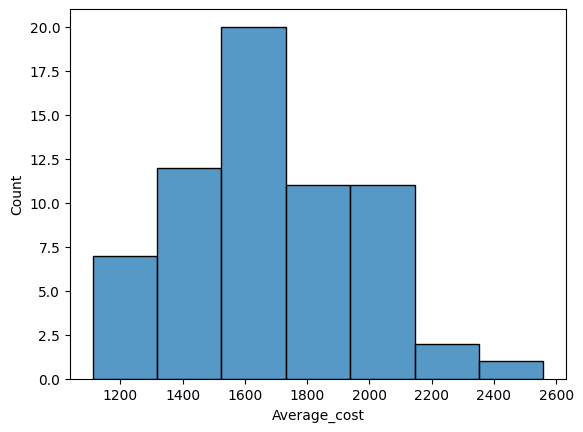

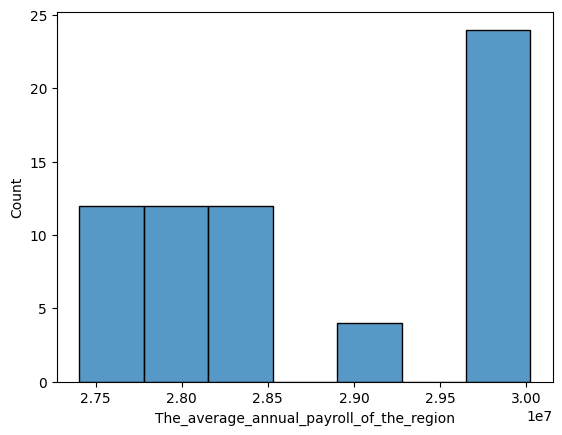

In [113]:
#histogram to understand the distribution
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

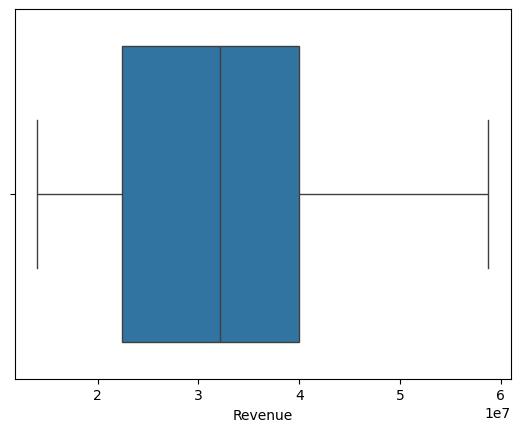

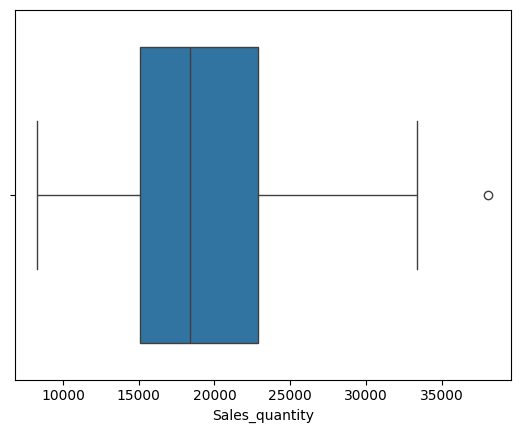

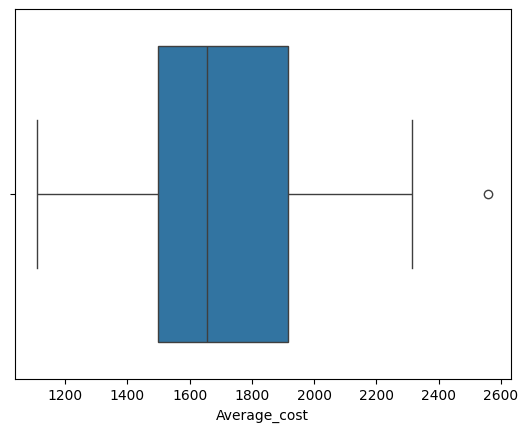

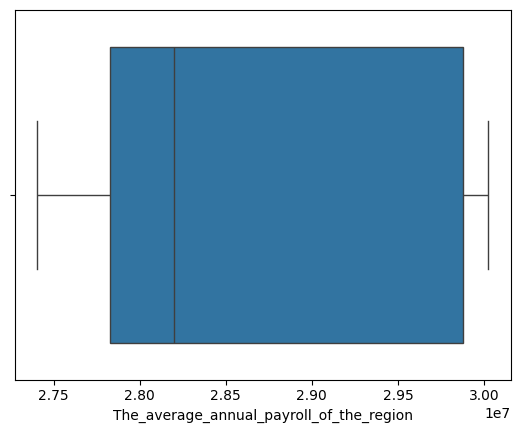

In [114]:
#Bpxplot to identify outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

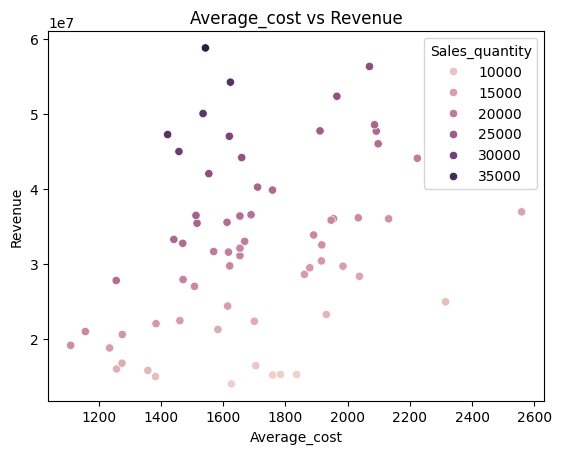

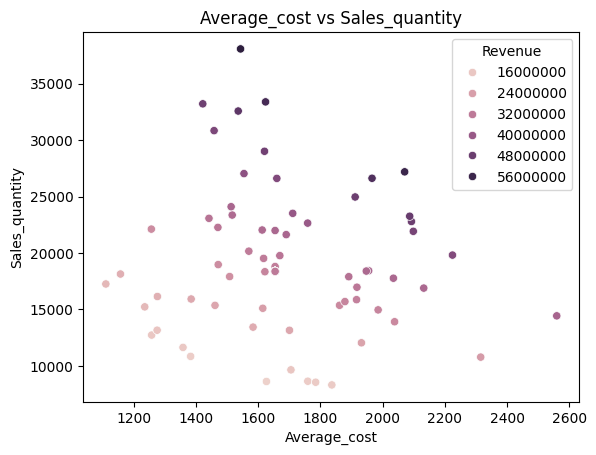

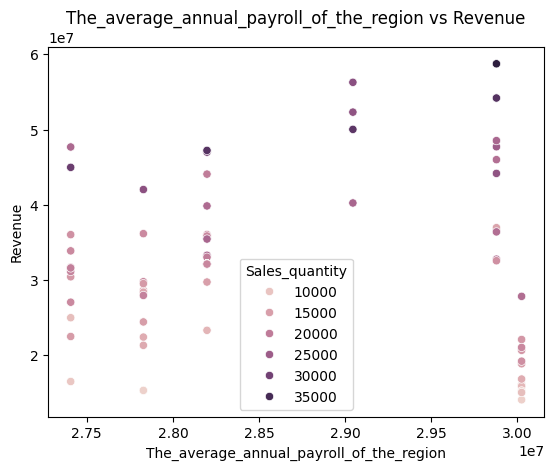

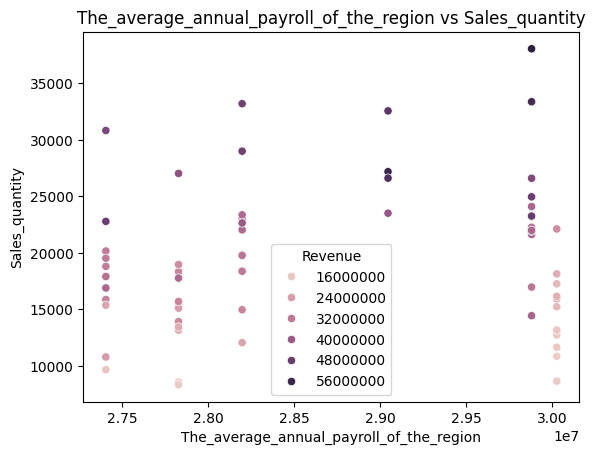

In [164]:
#scatterplot to understand the relationship
for i in [ 'Average_cost','The_average_annual_payroll_of_the_region']:
    sns.scatterplot(data=df,x=i,y='Revenue',hue='Sales_quantity')
    plt.title(f'{i} vs Revenue')
    plt.show()
    
    sns.scatterplot(data=df, x=i, y='Sales_quantity', hue='Revenue')
    plt.title(f'{i} vs Sales_quantity')
    plt.show()

In [116]:
df.select_dtypes(include="number").columns

Index(['Revenue', 'Sales_quantity', 'Average_cost',
       'The_average_annual_payroll_of_the_region'],
      dtype='object')

In [122]:
#correlation with heatmapt to interpret the relationship and multicoliniarity
df.corr()


,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Revenue,1.000000,0.887570,0.358278,-0.007111
Sales_quantity,0.887570,1.000000,-0.093599,0.103704
Average_cost,0.358278,-0.093599,1.000000,-0.305145
The_average_annual_payroll_of_the_region,-0.007111,0.103704,-0.305145,1.000000


In [127]:
s =df.select_dtypes(include="number").corr()

<Axes: >

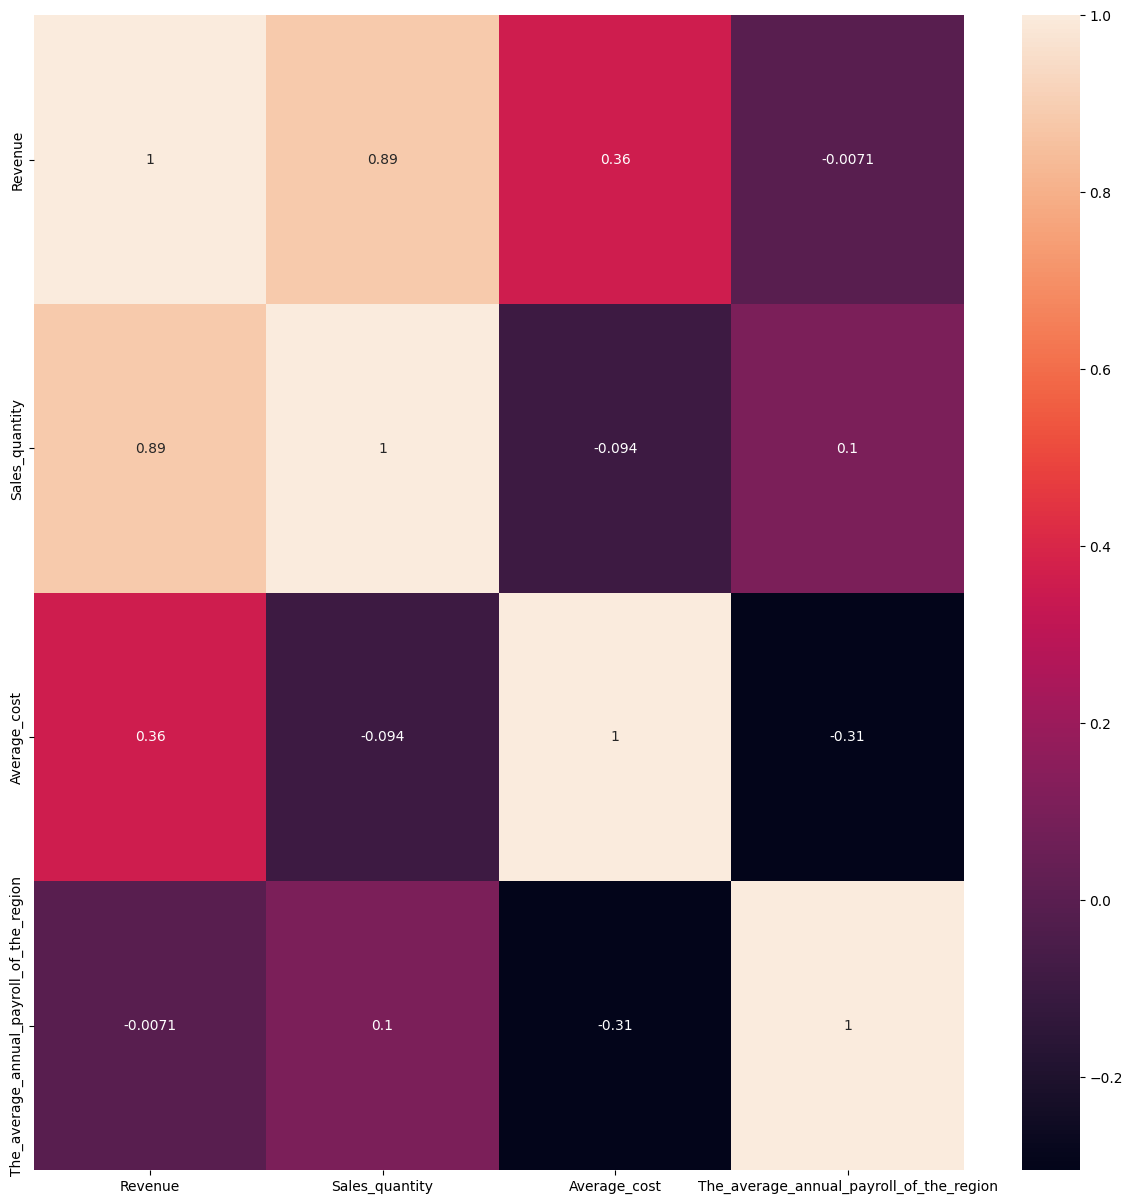

In [132]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

In [ ]:
#Missing value treatment


In [133]:
df.isnull().sum()

Period                                       0
Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64

In [138]:
for i in ["Average_cost", "The_average_annual_payroll_of_the_region"]:
    df[i].fillna(df[i].median(), inplace=True)

In [137]:
print("Before filling missing values:")
print(df.head())

for i in ["Average_cost","The_average_annual_payroll_of_the_region"]:
    df[i].fillna(df[i].median(), inplace=True)

print("\nAfter filling missing values:")
print(df.head())

Before filling missing values:
       Period       Revenue  Sales_quantity  Average_cost  \
0  01.01.2015  1.601007e+07         12729.0   1257.763541   
1  01.02.2015  1.580759e+07         11636.0   1358.507000   
2  01.03.2015  2.204715e+07         15922.0   1384.697024   
3  01.04.2015  1.881458e+07         15227.0   1235.606705   
4  01.05.2015  1.402148e+07          8620.0   1626.621765   

   The_average_annual_payroll_of_the_region  
0                                30024676.0  
1                                30024676.0  
2                                30024676.0  
3                                30024676.0  
4                                30024676.0  

After filling missing values:
       Period       Revenue  Sales_quantity  Average_cost  \
0  01.01.2015  1.601007e+07         12729.0   1257.763541   
1  01.02.2015  1.580759e+07         11636.0   1358.507000   
2  01.03.2015  2.204715e+07         15922.0   1384.697024   
3  01.04.2015  1.881458e+07         15227.0   1235.

In [139]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

Period                                       0
Revenue                                     32
Sales_quantity                              32
Average_cost                                 0
The_average_annual_payroll_of_the_region     0
dtype: int64


In [140]:
df['Revenue'].fillna(df['Revenue'].median(), inplace=True)
df['Sales_quantity'].fillna(df['Sales_quantity'].median(), inplace=True)

In [142]:
missing_values_count = df.isnull().sum()
print(missing_values_count)


Period                                      0
Revenue                                     0
Sales_quantity                              0
Average_cost                                0
The_average_annual_payroll_of_the_region    0
dtype: int64


In [159]:
print(df.columns)

Index(['Revenue', 'Sales_quantity', 'Average_cost',
       'The_average_annual_payroll_of_the_region', 'Period_0', 'Period_1',
       'Period_2', 'Period_3', 'Period_4', 'Period_5', 'Period_6', 'Period_7',
       'Period_8', 'Period_9', 'Period_10', 'Period_11', 'Period_12',
       'Period_13', 'Period_14', 'Period_15', 'Period_16', 'Period_17',
       'Period_18', 'Period_19', 'Period_20', 'Period_21', 'Period_22',
       'Period_23', 'Period_24', 'Period_25', 'Period_26', 'Period_27',
       'Period_28', 'Period_29', 'Period_30', 'Period_31', 'Period_32',
       'Period_33', 'Period_34', 'Period_35', 'Period_36', 'Period_37',
       'Period_38', 'Period_39', 'Period_40', 'Period_41', 'Period_42',
       'Period_43', 'Period_44', 'Period_45', 'Period_46', 'Period_47',
       'Period_48', 'Period_49', 'Period_50', 'Period_51', 'Period_52',
       'Period_53', 'Period_54', 'Period_55', 'Period_56', 'Period_57',
       'Period_58', 'Period_59', 'Period_60', 'Period_61', 'Period_62',
    

In [161]:
df = pd.get_dummies(data=df, drop_first=True)
print(df)

         Revenue  Sales_quantity  Average_cost  \
0   1.601007e+07         12729.0   1257.763541   
1   1.580759e+07         11636.0   1358.507000   
2   2.204715e+07         15922.0   1384.697024   
3   1.881458e+07         15227.0   1235.606705   
4   1.402148e+07          8620.0   1626.621765   
..           ...             ...           ...   
91  3.209088e+07         18368.0   1654.399798   
92  3.209088e+07         18368.0   1654.399798   
93  3.209088e+07         18368.0   1654.399798   
94  3.209088e+07         18368.0   1654.399798   
95  3.209088e+07         18368.0   1654.399798   

    The_average_annual_payroll_of_the_region  Period_0  Period_1  Period_2  \
0                                 30024676.0         1         0         0   
1                                 30024676.0         0         0         0   
2                                 30024676.0         0         0         0   
3                                 30024676.0         0         0         0   
4        

In [163]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel


# 2. Split the data into train and test sets
X = df.drop(['Revenue'], axis=1)  
y = df['Revenue']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

xgb_model = XGBRegressor()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

# 4. Feature Selection
best_model = grid_search.best_estimator_
feature_selector = SelectFromModel(best_model, threshold='median')
feature_selector.fit(X_train, y_train)
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# 5. Train the model with selected features
best_model.fit(X_train_selected, y_train)

# 6. Evaluate the model
y_pred = best_model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Mean Squared Error: 2292925641141.009
